In [1]:
import pathlib
import json
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np

import scipy.stats


In [10]:
Record = namedtuple('Record', 
                    ['header', 'train_loss', 'test_loss'])

def parse_file(fname):
    train_loss = []
    test_loss = []
    
    with open(fname, 'r') as f:
        for _ in range(3): f.readline()
        
        header = eval(f.readline())
        
        header = [x.split('=') for x in header if '=' in x]
        header = [[x[0][2:], x[1]] for x in header]
        header = dict(header)
        
        f.readline()

        for line in f:
            if line.startswith('#') or line.startswith('submitit') or 'tensor' in line: continue
            
            try:
                line = json.loads(line)
            except:
                print(line)
                return
            
            if 'mode' in line and line['mode'] == 'train':
                train_loss.append(line['loss'])
                continue
            if 'mode' in line and line['mode'] == 'test':
                test_loss.append(line['loss'])
                continue        

    return Record(header=header, train_loss=train_loss, test_loss=test_loss)                
            

In [11]:
def get_language_name(datum):
    name = 'rotated' if datum.header['lenses'] == '1' else 'identity'
    return name

In [12]:
paths = [
'/private/home/kharitonov/nest/compositional_efficiency/2020_02_08_11_19_18/'
]

data = []

for path in paths:
    for fname in pathlib.Path(path).rglob('*.out'):
        parsed = parse_file(fname)
        data.append(parsed)

In [13]:
data[0].header

{'vocab_size': '100',
 'batch_size': '32',
 'n_epochs': '100',
 'random_seed': '0',
 'receiver_hidden': '100',
 'receiver_emb': '50',
 'receiver_cell': 'lstm',
 'receiver_layers': '0',
 'lenses': '0',
 'checkpoint_freq': '1',
 'checkpoint_dir': '/private/home/kharitonov/nest/compositional_efficiency/2020_02_08_11_19_18'}

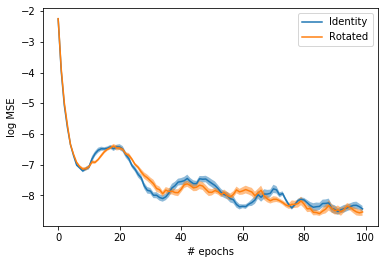

In [47]:
language2caption = {
    'identity': 'Identity',
    'rotated': 'Rotated',
}



languages = sorted(list(set(get_language_name(x) for x in data)))
               
for language in languages:
    xs = list(range(100))
    
    ys = [[] for _ in range(100)]
    stds = [[] for _ in range(100)]
    
    for log in data:
        if get_language_name(log) != language:
            continue

        for i, y in enumerate(log.train_loss):
            ys[i].append(np.log(y))
    
    means = np.array([np.mean(t) for t in ys])
    stds = np.array([np.std(t) / np.sqrt(len(t)) for t in ys])

    plt.plot(xs, means, label=language2caption[language])
    plt.fill_between(xs, means-stds*0.5, means+stds*0.5, alpha=0.5)

    plt.ylabel('log MSE')
    plt.xlabel('# epochs')
    
plt.legend()
plt.savefig('train.pdf')
plt.show()

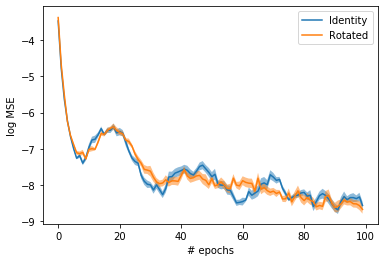

In [48]:
language2caption = {
    'identity': 'Identity',
    'rotated': 'Rotated',
}



languages = sorted(list(set(get_language_name(x) for x in data)))
               
for language in languages:
    xs = list(range(100))
    
    ys = [[] for _ in range(100)]
    stds = [[] for _ in range(100)]
    
    for log in data:
        if get_language_name(log) != language:
            continue

        for i, y in enumerate(log.test_loss):
            ys[i].append(np.log(y))
    
    means = np.array([np.mean(t) for t in ys])
    stds = np.array([np.std(t) / np.sqrt(len(t)) for t in ys])

    plt.plot(xs, means, label=language2caption[language])
    plt.fill_between(xs, means-stds*0.5, means+stds*0.5, alpha=0.5)

    plt.ylabel('log MSE')
    plt.xlabel('# epochs')
    
plt.legend()
plt.savefig('test.pdf')

plt.show()

In [39]:
def mean_std(data):
    means = []
    stds = []
    
    losses = [d.test_loss for d in data]
    
    for l in zip(*losses):
        means.append(np.mean(l))
        stds.append(np.std(l) / np.sqrt(len(l)))
        
    return means, stds

In [40]:
for slice, name, color in [
        (no_rotation, 'no rotation', 'r'), 
        (rotation, 'rotation', 'black'),
        (swap_data, 'swap', 'blue')]:
    means, stds = mean_std(slice)
    xs = list(range(1, len(means) + 1))
    #plt.plot(means[:3], label=name, color=color)
    plt.errorbar(x=xs[:20], y=means[:20], yerr=stds[:20], color=color, alpha=0.75, label=name)
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.legend()

NameError: name 'no_rotation' is not defined

In [171]:
mean_std(rotation)

NameError: name 'rotation' is not defined